In [196]:
import pandas as pd
import numpy as np

#set few options
pd.set_option("display.precision", 3)
pd.set_option('display.min_rows', 8)
pd.set_option('display.width', 2000)

In [197]:
#ead xlxs file
cc_xls_0=pd.read_excel("D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\Credit Card Data.xlsx",sheet_name= 0, parse_dates=True)

In [198]:
cc_xls_0.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,47,BANGALORE,Gold,1500000,C1,Self Employed
1,2,A2,56,CALCUTTA,Silver,300000,C2,Salaried_MNC
2,3,A3,30,COCHIN,Platimum,540000,C3,Salaried_Pvt
3,4,A4,22,BOMBAY,Platimum,840084,C4,Govt
4,5,A5,59,BANGALORE,Platimum,420084,C5,Normal Salary


In [199]:
cc_xls_0.sample()

,No,Customer,Age,City,Product,Limit,Company,Segment
69,70,A70,16,BOMBAY,Platimum,420000,C32,Self Employed


In [200]:
cc_xls_0.describe()

,No,Age,Limit
count,100.00,100.00,100.00
mean,50.50,46.46,710404.05
std,29.01,17.82,529828.97
min,1.00,14.00,10000.00
25%,25.75,30.00,442521.00
50%,50.50,47.50,500000.00
75%,75.25,62.25,1200000.00
max,100.00,75.00,3000000.00


In [201]:
# check blanks, missing values
cc_xls_0.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [202]:
cc_xls_0.query('Age<18')

,No,Customer,Age,City,Product,Limit,Company,Segment
46,47,A47,16,CHENNAI,Platimum,1380000,C9,Normal Salary
69,70,A70,16,BOMBAY,Platimum,420000,C32,Self Employed
93,94,A94,14,COCHIN,Gold,500000,C17,Govt


In [203]:
mean_age=cc_xls_0['Age'].mean()
print(mean_age)

46.46


In [204]:
#changing the age -leas than 18 to mean age 
cc_xls_0.loc[cc_xls_0['Age']<=18,['Age']] = mean_age

In [205]:
print(cc_xls_0)

     No Customer   Age        City   Product    Limit Company        Segment
0     1       A1 47.00   BANGALORE      Gold  1500000      C1  Self Employed
1     2       A2 56.00    CALCUTTA    Silver   300000      C2   Salaried_MNC
2     3       A3 30.00      COCHIN  Platimum   540000      C3   Salaried_Pvt
3     4       A4 22.00      BOMBAY  Platimum   840084      C4           Govt
..  ...      ...   ...         ...       ...      ...     ...            ...
96   97      A97 75.00  TRIVANDRUM  Platimum    30000     C20           Govt
97   98      A98 29.00    CALCUTTA  Platimum    30000     C21  Normal Salary
98   99      A99 59.00    CALCUTTA  Platimum   120000     C22  Self Employed
99  100     A100 55.00      COCHIN    Silver   100000      C5   Salaried_MNC

[100 rows x 8 columns]


In [206]:
#test teh the record at location 46 has been changed
cc_xls_0.iloc[69]

No                     70
Customer              A70
Age                 46.46
City               BOMBAY
Product          Platimum
Limit              420000
Company               C32
Segment     Self Employed
Name: 69, dtype: object

In [207]:
cc_xls_0.shape

(100, 8)

In [208]:
cc_xls_0.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment'], dtype='object')

In [209]:
cc_xls_0.index

RangeIndex(start=0, stop=100, step=1)

In [210]:
# to check if we have missing values 
cc_xls_0.count()

No          100
Customer    100
Age         100
City        100
Product     100
Limit       100
Company     100
Segment     100
dtype: int64

In [211]:
# to find unique customers
unq_cust=cc_xls_0['Customer'].unique()
print(unq_cust)

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13'
 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'A25'
 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'A33' 'A34' 'A35' 'A36' 'A37'
 'A38' 'A39' 'A40' 'A41' 'A42' 'A43' 'A44' 'A45' 'A46' 'A47' 'A48' 'A49'
 'A50' 'A51' 'A52' 'A53' 'A54' 'A55' 'A56' 'A57' 'A58' 'A59' 'A60' 'A61'
 'A62' 'A63' 'A64' 'A65' 'A66' 'A67' 'A68' 'A69' 'A70' 'A71' 'A72' 'A73'
 'A74' 'A75' 'A76' 'A77' 'A78' 'A79' 'A80' 'A81' 'A82' 'A83' 'A84' 'A85'
 'A86' 'A87' 'A88' 'A89' 'A90' 'A91' 'A92' 'A93' 'A94' 'A95' 'A96' 'A97'
 'A98' 'A99' 'A100']


In [212]:
# read for tab spend 
cc_xls_1=pd.read_excel("D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\Credit Card Data.xlsx",sheet_name= 1, parse_dates=True)

In [213]:
cc_xls_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [214]:
cc_xls_1['Month']=pd.to_datetime(cc_xls_1['Month'])

In [215]:
cc_xls_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Sl No:    1500 non-null   int64         
 1   Customer  1500 non-null   object        
 2   Month     1500 non-null   datetime64[ns]
 3   Type      1500 non-null   object        
 4   Amount    1500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 58.7+ KB


In [216]:
#Categories
#Ranked categorywise average spend 
print(cc_xls_1['Type'].unique())
cat_spend=cc_xls_1.groupby('Type').mean('Amount')
cat_spend.drop('Sl No:',axis=1,inplace=True)
cat_spend.sort_values('Amount',ascending=True)

['JEWELLERY' 'PETRO' 'CLOTHES' 'FOOD' 'CAMERA' 'SANDALS' 'CAR' 'BIKE'
 'AUTO' 'SHOPPING' 'AIR TICKET' 'BUS TICKET' 'TRAIN TICKET' 'RENTAL'
 'MOVIE TICKET']


,Amount
Type,
FOOD,341.17
PETRO,549.48
TRAIN TICKET,1627.49
MOVIE TICKET,1875.30
SANDALS,2516.63
SHOPPING,7394.33
BUS TICKET,12681.03
RENTAL,13106.51
CAMERA,21499.80


In [217]:
# make a new columns based on month and year 
cc_xls_1['mm'] = pd.DatetimeIndex(cc_xls_1['Month']).month
cc_xls_1['yy']=pd.DatetimeIndex(cc_xls_1['Month']).year
cc_xls_1.drop('Sl No:',axis=1,inplace=True)

In [218]:
cc_xls_1

,Customer,Month,Type,Amount,mm,yy
0,A1,2004-01-12,JEWELLERY,344054.98,1,2004
1,A1,2004-01-03,PETRO,935.50,1,2004
2,A1,2004-01-15,CLOTHES,8687.90,1,2004
3,A1,2004-01-25,FOOD,341.16,1,2004
...,...,...,...,...,...,...
1496,A68,2006-03-25,BUS TICKET,22218.20,3,2006
1497,A69,2006-03-31,BUS TICKET,10004.91,3,2006
1498,A70,2006-03-23,BUS TICKET,31630.83,3,2006
1499,A71,2006-03-24,BUS TICKET,33048.37,3,2006


In [219]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [220]:
yr_cat_av_month_spend=cc_xls_1.groupby(['yy','Type']).sum('Amount')/12
print(yr_cat_av_month_spend['Amount'])

yy    Type        
2004  AIR TICKET      715160.93
      AUTO              4065.07
      BIKE             76346.65
      BUS TICKET       35397.17
      CAMERA          111773.35
      CAR             447106.19
      CLOTHES          51937.64
      FOOD              1633.56
      JEWELLERY       507969.00
      MOVIE TICKET      1518.97
      PETRO             2329.79
      RENTAL           21635.01
      SANDALS           1279.22
      SHOPPING         29827.02
      TRAIN TICKET      3534.60
2005  AIR TICKET     1129482.44
      AUTO             20520.30
      BIKE            394218.34
      BUS TICKET       36833.80
      CAMERA           96675.16
      CAR             123598.78
      CLOTHES          65127.75
      FOOD              1368.21
      JEWELLERY       681538.22
      MOVIE TICKET      4547.34
      PETRO             3701.57
      RENTAL           31408.86
      SANDALS           2109.52
      SHOPPING         20449.62
      TRAIN TICKET      7326.05
2006  AIR TICKET     

In [221]:
# on categories, average Month spend ( 1=Jan, 2=Feb, 3=Mar...)

pd.crosstab(cc_xls_1.Type,cc_xls_1.mm,values=cc_xls_1.Amount, aggfunc='mean')

mm,1,2,3,4,5,6,7,8,9,10,11,12
Type,,,,,,,,,,,,
AIR TICKET,272151.76,226079.39,286005.08,255372.02,265359.44,205072.72,337515.79,277366.65,292399.75,213797.64,187761.57,94397.46
AUTO,16260.27,34280.59,31014.27,39690.40,21505.87,NaN,NaN,NaN,NaN,NaN,25194.89,1824.41
BIKE,204153.23,136446.82,283637.43,148895.84,187850.43,NaN,NaN,NaN,NaN,NaN,271992.78,NaN
BUS TICKET,10181.61,19792.88,14994.27,10592.41,9407.59,12374.42,1762.55,21678.22,4813.98,4326.49,9669.47,NaN
CAMERA,21392.13,15697.42,21417.34,20911.75,20253.45,21912.07,24869.45,29223.32,32782.09,NaN,16338.03,NaN
CAR,369868.57,891575.91,397509.35,123053.08,361677.78,NaN,NaN,NaN,389408.87,333026.81,459281.33,NaN
CLOTHES,21656.12,24939.44,28218.62,31159.42,23423.02,44392.93,NaN,NaN,21892.01,NaN,26346.87,18372.14
FOOD,350.14,308.24,344.34,337.90,349.61,293.08,486.54,358.19,330.85,296.45,250.58,327.88
JEWELLERY,274719.35,260053.60,156772.08,242806.97,180438.44,322625.84,101116.28,NaN,278895.08,199723.74,434209.47,459681.33


In [222]:
#Agrregrate Customer wise gross spend
cust_GrossSpend=cc_xls_1.groupby('Customer').agg({'Amount':[np.sum]})
print(cust_GrossSpend)

             Amount
                sum
Customer           
A1       2202653.18
A10       319527.63
A100        4625.13
A11      1169124.17
...             ...
A96        94369.18
A97        13440.47
A98        12746.03
A99       108137.20

[100 rows x 1 columns]


In [223]:
cc_xls_2=pd.read_excel("D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\Credit Card Data.xlsx",sheet_name= 2, parse_dates=True)

In [224]:
cc_xls_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SL No:    807 non-null    int64         
 1   Customer  807 non-null    object        
 2   Month     803 non-null    datetime64[ns]
 3   Amount    807 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 25.3+ KB


In [225]:
cc_xls_2['Month']=pd.to_datetime(cc_xls_2['Month'])

In [226]:
cc_xls_2

,SL No:,Customer,Month,Amount
0,1,A1,2006-05-15,230847.25
1,2,A1,2005-08-27,1835.12
2,3,A1,2004-03-07,4858.70
3,4,A1,2005-03-01,1360526.91
...,...,...,...,...
803,804,A96,2004-01-26,50619.18
804,805,A97,2004-02-02,5186.47
805,806,A98,2004-02-05,12746.03
806,807,A99,2004-02-04,108137.20


In [227]:
#find the Month places do not have values or NaT
cc_xls_2[cc_xls_2['Month'].isnull()]


,SL No:,Customer,Month,Amount
274,275,A29,NaT,139343.95
299,300,A30,NaT,75520.70
418,419,A40,NaT,4203.40
789,790,A9,NaT,20150.64


In [228]:
cc_xls_2.drop('SL No:',axis=1,inplace=True)

In [229]:
cust_GrossPayment=cc_xls_2.groupby('Customer').agg({'Amount':[np.sum]})
print(cust_GrossPayment)

             Amount
                sum
Customer           
A1       1798150.18
A10       159960.63
A100        4625.13
A11      1127754.17
...             ...
A96        50619.18
A97         5186.47
A98        12746.03
A99       108137.20

[100 rows x 1 columns]


In [230]:
#merged df , Customer Details , Gross Send , Gross Payment 
cust_merge=pd.merge(cc_xls_0, cust_GrossSpend,how='left',left_on='Customer',right_on='Customer' )
print(cust_merge)

     No Customer   Age        City   Product    Limit Company        Segment  (Amount, sum)
0     1       A1 47.00   BANGALORE      Gold  1500000      C1  Self Employed     2202653.18
1     2       A2 56.00    CALCUTTA    Silver   300000      C2   Salaried_MNC      175463.27
2     3       A3 30.00      COCHIN  Platimum   540000      C3   Salaried_Pvt      533443.09
3     4       A4 22.00      BOMBAY  Platimum   840084      C4           Govt      904660.07
..  ...      ...   ...         ...       ...      ...     ...            ...            ...
96   97      A97 75.00  TRIVANDRUM  Platimum    30000     C20           Govt       13440.47
97   98      A98 29.00    CALCUTTA  Platimum    30000     C21  Normal Salary       12746.03
98   99      A99 59.00    CALCUTTA  Platimum   120000     C22  Self Employed      108137.20
99  100     A100 55.00      COCHIN    Silver   100000      C5   Salaried_MNC        4625.13

[100 rows x 9 columns]


In [231]:
#unfied datafram with customer Gross Spend and Gross payment
cust_merge=pd.merge(cust_merge, cust_GrossPayment,how='left',left_on='Customer',right_on='Customer' )
print(cust_merge)

     No Customer   Age        City   Product    Limit Company        Segment  ('Amount', 'sum')_x  (Amount, sum)
0     1       A1 47.00   BANGALORE      Gold  1500000      C1  Self Employed           2202653.18     1798150.18
1     2       A2 56.00    CALCUTTA    Silver   300000      C2   Salaried_MNC            175463.27       92325.27
2     3       A3 30.00      COCHIN  Platimum   540000      C3   Salaried_Pvt            533443.09      531399.09
3     4       A4 22.00      BOMBAY  Platimum   840084      C4           Govt            904660.07      891531.07
..  ...      ...   ...         ...       ...      ...     ...            ...                  ...            ...
96   97      A97 75.00  TRIVANDRUM  Platimum    30000     C20           Govt             13440.47        5186.47
97   98      A98 29.00    CALCUTTA  Platimum    30000     C21  Normal Salary             12746.03       12746.03
98   99      A99 59.00    CALCUTTA  Platimum   120000     C22  Self Employed            108137.2

In [232]:
list(cust_merge)

['No',
 'Customer',
 'Age',
 'City',
 'Product',
 'Limit',
 'Company',
 'Segment',
 "('Amount', 'sum')_x",
 ('Amount', 'sum')]

In [233]:
cust_merge.columns=['No',
 'Customer',
 'Age',
 'City',
 'Product',
 'Limit',
 'Company',
 'Segment',
 'GrossPurchase','GrossPayment']

In [234]:
print(cust_merge)

     No Customer   Age        City   Product    Limit Company        Segment  GrossPurchase  GrossPayment
0     1       A1 47.00   BANGALORE      Gold  1500000      C1  Self Employed     2202653.18    1798150.18
1     2       A2 56.00    CALCUTTA    Silver   300000      C2   Salaried_MNC      175463.27      92325.27
2     3       A3 30.00      COCHIN  Platimum   540000      C3   Salaried_Pvt      533443.09     531399.09
3     4       A4 22.00      BOMBAY  Platimum   840084      C4           Govt      904660.07     891531.07
..  ...      ...   ...         ...       ...      ...     ...            ...            ...           ...
96   97      A97 75.00  TRIVANDRUM  Platimum    30000     C20           Govt       13440.47       5186.47
97   98      A98 29.00    CALCUTTA  Platimum    30000     C21  Normal Salary       12746.03      12746.03
98   99      A99 59.00    CALCUTTA  Platimum   120000     C22  Self Employed      108137.20     108137.20
99  100     A100 55.00      COCHIN    Silver  

In [235]:
cust_merge['NetLiabity']=cust_merge['GrossPurchase']-cust_merge['GrossPayment']
print(cust_merge)

     No Customer   Age        City   Product    Limit Company        Segment  GrossPurchase  GrossPayment  NetLiabity
0     1       A1 47.00   BANGALORE      Gold  1500000      C1  Self Employed     2202653.18    1798150.18   404503.00
1     2       A2 56.00    CALCUTTA    Silver   300000      C2   Salaried_MNC      175463.27      92325.27    83138.00
2     3       A3 30.00      COCHIN  Platimum   540000      C3   Salaried_Pvt      533443.09     531399.09     2044.00
3     4       A4 22.00      BOMBAY  Platimum   840084      C4           Govt      904660.07     891531.07    13129.00
..  ...      ...   ...         ...       ...      ...     ...            ...            ...           ...         ...
96   97      A97 75.00  TRIVANDRUM  Platimum    30000     C20           Govt       13440.47       5186.47     8254.00
97   98      A98 29.00    CALCUTTA  Platimum    30000     C21  Normal Salary       12746.03      12746.03        0.00
98   99      A99 59.00    CALCUTTA  Platimum   120000   

In [236]:
cust_merge['%util']=(cust_merge['NetLiabity']/cust_merge['Limit'])*100
print(cust_merge.sort_values('%util',ascending=False))

     No Customer   Age       City   Product    Limit Company        Segment  GrossPurchase  GrossPayment  NetLiabity  %util
20   21      A21 22.00     COCHIN  Platimum   780000     C21  Normal Salary     2136421.83    1301177.83   835244.00 107.08
4     5       A5 59.00  BANGALORE  Platimum   420084      C5  Normal Salary      923534.79     539831.79   383703.00  91.34
60   61      A61 63.00     COCHIN      Gold  1500000     C23           Govt     4113751.63    2776650.63  1337101.00  89.14
12   13      A13 38.00  BANGALORE      Gold   500000     C13   Salaried_MNC     1424137.66    1011635.66   412502.00  82.50
..  ...      ...   ...        ...       ...      ...     ...            ...            ...           ...         ...    ...
78   79      A79 35.00     COCHIN    Silver   500000     C41           Govt        3166.70       3166.70        0.00   0.00
79   80      A80 71.00     BOMBAY    Silver  1500000      C3           Govt      950543.27     950543.27        0.00   0.00
80   81 

In [237]:
#customers reaching 90% of thier respective limit

cust_merge[cust_merge['%util']>90]

,No,Customer,Age,City,Product,Limit,Company,Segment,GrossPurchase,GrossPayment,NetLiabity,%util
4,5,A5,59.00,BANGALORE,Platimum,420084,C5,Normal Salary,923534.79,539831.79,383703.00,91.34
20,21,A21,22.00,COCHIN,Platimum,780000,C21,Normal Salary,2136421.83,1301177.83,835244.00,107.08


In [238]:
#maximum number of customer are Cochin, Bangalore
cust_merge.groupby(['City']).agg({'Customer':['count']})

,Customer
,count
City,
BANGALORE,19
BOMBAY,14
CALCUTTA,18
CHENNAI,8
COCHIN,20
DELHI,7
PATNA,7
TRIVANDRUM,7


In [239]:
col_to_use=['OBJECTID','Borough','Type','Provider','Location_T','City']

In [240]:
wifi_xls=pd.read_excel('D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\Wifi Data.xlsx',index_col='OBJECTID',usecols=col_to_use)
print(wifi_xls)

         Borough          Type              Provider     Location_T      City
OBJECTID                                                                     
1             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
2             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
3             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
4             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
...          ...           ...                   ...            ...       ...
2563          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York
2564          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York
2565          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York
2566          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York

[2566 rows x 5 columns]


In [241]:
#check missing values 
wifi_xls.isnull().sum()

Borough       0
Type          0
Provider      0
Location_T    0
City          0
dtype: int64

In [242]:
prov_allserv=wifi_xls.groupby('Provider').agg({'Type':['count']})
type(prov_allserv)
prov_allserv.columns=['Free+Paid']
print(prov_allserv)

                         Free+Paid
Provider                          
ALTICEUSA                      237
AT&T                            27
BPL                             59
Chelsea                         30
City Tech                       11
Downtown Brooklyn              100
Harlem                         128
LinkNYC - Citybridge          1134
Manhattan Down Alliance         36
NYCHA                           28
NYPL                            90
Partner                          2
QPL                             65
SPECTRUM                       343
Transit Wireless               276


In [243]:
import matplotlib.pyplot as plt
import scipy
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

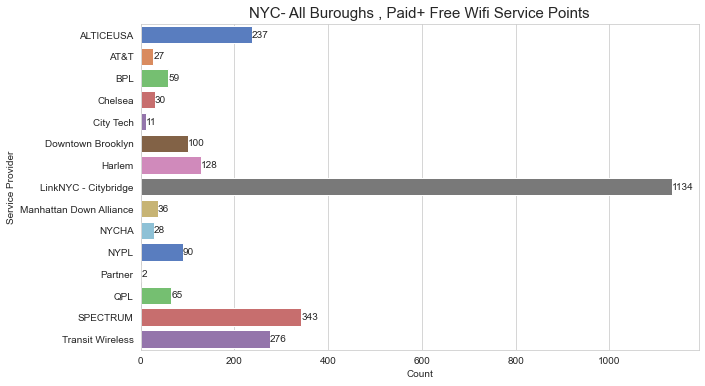

In [244]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Free+Paid', y=prov_allserv.index, data=prov_allserv, ci=None, palette="muted",orient='h')
ax.bar_label(ax.containers[0])    #for single seris, for multi seris loop throuh ax.containers
ax.set_title("NYC- All Buroughs , Paid+ Free Wifi Service Points", fontsize=15)
ax.set_xlabel ("Count")
ax.set_ylabel ("Service Provider")
plt.show()

In [245]:
# there are providers do not provide free services

wifi_xls.groupby('Type').agg({'Provider':['count']})

,Provider
,count
Type,
Free,1983
Limited Free,581
Partner Site,2


In [246]:
wifi_xls.sort_values('Type',inplace=True)

In [247]:
filtering_free=wifi_xls['Type']=='Free'

In [248]:
wifi_xls.where(filtering_free,inplace=True)

In [249]:
wifi_xls

,Borough,Type,Provider,Location_T,City
OBJECTID,,,,,
2566,MN,Free,LinkNYC - Citybridge,Outdoor Kiosk,New York
2188,MN,Free,Transit Wireless,Subway Station,New York
2189,MN,Free,Transit Wireless,Subway Station,New York
2190,MN,Free,Transit Wireless,Subway Station,New York
...,...,...,...,...,...
1327,NaN,NaN,NaN,NaN,NaN
1333,NaN,NaN,NaN,NaN,NaN
1645,NaN,NaN,NaN,NaN,NaN
2531,NaN,NaN,NaN,NaN,NaN


In [250]:
wifi_xls.tail(10)

,Borough,Type,Provider,Location_T,City
OBJECTID,,,,,
1334,NaN,NaN,NaN,NaN,NaN
1332,NaN,NaN,NaN,NaN,NaN
1331,NaN,NaN,NaN,NaN,NaN
1330,NaN,NaN,NaN,NaN,NaN
1329,NaN,NaN,NaN,NaN,NaN
1328,NaN,NaN,NaN,NaN,NaN
1327,NaN,NaN,NaN,NaN,NaN
1333,NaN,NaN,NaN,NaN,NaN
1645,NaN,NaN,NaN,NaN,NaN


In [251]:
wifi_xls_free=wifi_xls.dropna()

In [252]:
wifi_xls_free

,Borough,Type,Provider,Location_T,City
OBJECTID,,,,,
2566,MN,Free,LinkNYC - Citybridge,Outdoor Kiosk,New York
2188,MN,Free,Transit Wireless,Subway Station,New York
2189,MN,Free,Transit Wireless,Subway Station,New York
2190,MN,Free,Transit Wireless,Subway Station,New York
...,...,...,...,...,...
671,BX,Free,LinkNYC - Citybridge,Outdoor Kiosk,Bronx
672,BX,Free,LinkNYC - Citybridge,Outdoor Kiosk,Bronx
666,BX,Free,LinkNYC - Citybridge,Outdoor Kiosk,Bronx
665,BX,Free,LinkNYC - Citybridge,Outdoor Kiosk,Bronx


In [253]:
prov_free=wifi_xls_free.groupby('Provider').agg({'Type':['count']})
type(prov_free)
prov_free.columns=['Free']
print(prov_free)

                         Free
Provider                     
AT&T                       26
BPL                        59
Chelsea                    30
City Tech                  11
Downtown Brooklyn         100
Harlem                    128
LinkNYC - Citybridge     1134
Manhattan Down Alliance    36
NYCHA                      28
NYPL                       90
QPL                        65
Transit Wireless          276


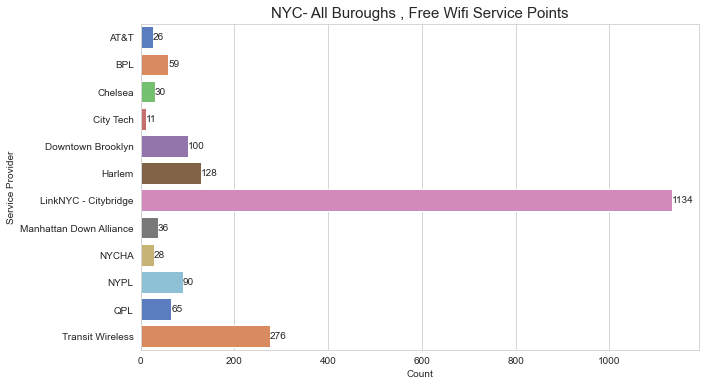

In [254]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Free', y=prov_free.index, data=prov_free, ci=None, palette="muted",orient='h')
ax.bar_label(ax.containers[0])    #for single seris, for multi seris loop throuh ax.containers
ax.set_title("NYC- All Buroughs , Free Wifi Service Points", fontsize=15)
ax.set_xlabel ("Count")
ax.set_ylabel ("Service Provider")
plt.show()

In [255]:
wifi_xls1=pd.read_excel('D:\\test_dir\\Bootcamp\\AAI DS Bootcamp - 01 Python - practise notebooks\\Wifi Data.xlsx',index_col='OBJECTID',usecols=col_to_use)
print(wifi_xls1)

         Borough          Type              Provider     Location_T      City
OBJECTID                                                                     
1             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
2             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
3             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
4             BK  Limited Free             ALTICEUSA        Outdoor  Brooklyn
...          ...           ...                   ...            ...       ...
2563          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York
2564          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York
2565          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York
2566          MN          Free  LinkNYC - Citybridge  Outdoor Kiosk  New York

[2566 rows x 5 columns]


In [256]:
# Most common Outdoor Kiosk
# Least common Outdoor TWS Aerial

where_n_count=wifi_xls1.groupby('Location_T').agg({'Type':'count'})
where_n_count.columns=['Nos']
print(where_n_count)

                     Nos
Location_T              
Indoor               125
Library              214
Outdoor              696
Outdoor Kiosk       1134
Outdoor TWC Aerial   121
Subway Station       276
